In [115]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split   # разделение выборки на train и test

from sklearn.model_selection import cross_val_score     # кросс-валидация
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
import xgboost as xgb, lightgbm as lgbm, catboost as catb

from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler    # стандартизация данных
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler      # масштабирование MinMaxScaler
from sklearn.preprocessing import Normalizer        # масштабирование Normalizer
from sklearn.decomposition import PCA   # метод главных компонент

from sklearn.linear_model import LogisticRegression     # модели классификации
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import VotingClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

In [116]:
# https://www.kaggle.com/c/geekbrains-competitive-data-analysis/overview

In [117]:
# пути
path_train = '/home/tefi/Tefi/Project_sport/train.csv'
path_test = '/home/tefi/Tefi/Project_sport/test.csv'
path_applications_history = '/home/tefi/Tefi/Project_sport/applications_history.csv'
path_bki = '/home/tefi/Tefi/Project_sport/bki.csv'
path_client_profile = '/home/tefi/Tefi/Project_sport/client_profile.csv'
path_payments = '/home/tefi/Tefi/Project_sport/payments.csv'
path_sample_submit = '/home/tefi/Tefi/Project_sport/sample_submit.csv'

# загрузка данных из файлов в соответствующие переменные
train_pro = pd.read_csv(path_train)
test_pro = pd.read_csv(path_test)
applications_history = pd.read_csv(path_applications_history)
bki = pd.read_csv(path_bki)
client_profile = pd.read_csv(path_client_profile)
payments = pd.read_csv(path_payments)
sample_submit = pd.read_csv(path_sample_submit)  # образец submit

Описание датасета:

APPLICATION_NUMBER - номер заявки
NAME_CONTRACT_TYPE - тип договора (наличные, карта)
TARGET - целевая переменная

История предыдущих заявок клиента:
PREV_APPLICATION_NUMBER - предыдущий номер заявки
AMOUNT_ANNUITY - сумма в год
AMT_APPLICATION - сумма заявки
AMOUNT_CREDIT - сумма кредита
AMOUNT_PAYMENT - сумма выплаты
AMOUNT_GOODS_PAYMENT - сумма стоимости товара 
NAME_CONTRACT_STATUS - статус годовора (одобрено, отклонено)
DAYS_DECISION - разрешение на кол-во дней
NAME_PAYMENT_TYPE - тип оплаты (наличными через банк и т.п.)
CODE_REJECT_REASON - причина отклонения
NAME_TYPE_SUITE - поручители
NAME_CLIENT_TYPE - тип клиента (новый, повторно)
NAME_GOODS_CATEGORY - категория товара
NAME_PORTFOLIO - название портфеля (наличные, карта)
NAME_PRODUCT_TYPE - тип товара (x-sell, wolk-in)
SELLERPLACE_AREA - площадь продажи
CNT_PAYMENT - кол-во выплат по кредиту
NAME_YIELD_GROUP - доходная группа (средняя, ниже среднего)
DAYS_FIRST_DRAWING - 
DAYS_FIRST_DUE - первый срок
DAYS_LAST_DUE_1ST_VERSION - прошло дней с 1 версии
DAYS_LAST_DUE - последний день
DAYS_TERMINATION - дней до завершения
NFLAG_INSURED_ON_APPROVAL - застрахован по принуждению

данные БКИ о предыдущих кредитах клиента:
BUREAU_ID - номер бюро
CREDIT_ACTIVE - активен ли кредит
CREDIT_CURRENCY - валюта кредита
DAYS_CREDIT - дни кредита
CREDIT_DAY_OVERDUE - кол-во дней просрочки
DAYS_CREDIT_ENDDATE - дней до конца кредита
DAYS_ENDDATE_FACT - фактически дней
AMT_CREDIT_MAX_OVERDUE - максимальная сумма просроченного кредита
CNT_CREDIT_PROLONG - продление текущего кредита
AMT_CREDIT_SUM - сумма кредита
AMT_CREDIT_SUM_DEBT - задолженность по кредиту
AMT_CREDIT_SUM_LIMIT - сумма предельного кредита
AMT_CREDIT_SUM_OVERDUE - сумма просроченного кредита
CREDIT_TYPE - тип кредита (потребительский)
DAYS_CREDIT_UPDATE - обновление дней кредита
AMT_ANNUITY - сумма ежегодной выплаты

Клиентский профиль, некоторые знания, которые есть у компании о клиенте:
GENDER - пол
CHILDRENS - дети
TOTAL_SALARY - зарплата
AMOUNT_CREDIT - сумма кредита
AMOUNT_ANNUITY - сумма ежегодной выплаты
EDUCATION_LEVEL - образование
FAMILY_STATUS - семейный статус (женат)
REGION_POPULATION - население региона
AGE - возраст
DAYS_ON_LAST_JOB - дней на последней работе 
OWN_CAR_AGE - возраст собственного автомобиля
FLAG_PHONE - наличие телефона
FLAG_EMAIL - наличие электронной почты
FAMILY_SIZE - размер семьи (2, 3)
EXTERNAL_SCORING_RATING_1 - внешний рейтинг 1
EXTERNAL_SCORING_RATING_2 - внешний рейтинг 2
EXTERNAL_SCORING_RATING_3 - внешний рейтинг 3
AMT_REQ_CREDIT_BUREAU_HOUR - сумма запросов на выдачу кредитов
AMT_REQ_CREDIT_BUREAU_DAY - сумма запросов на выдачу кредитов
AMT_REQ_CREDIT_BUREAU_WEEK - сумма запросов на выдачу кредитов
AMT_REQ_CREDIT_BUREAU_MON - сумма запросов на выдачу кредитов
AMT_REQ_CREDIT_BUREAU_QRT - сумма запросов на выдачу кредитов
AMT_REQ_CREDIT_BUREAU_YEAR - сумма запросов на выдачу кредитов

История платежей клиента:
NUM_INSTALMENT_VERSION - номер расчетной версии
NUM_INSTALMENT_NUMBER - расчетный номер
DAYS_INSTALMENT - дни рассрочки
DAYS_ENTRY_PAYMENT - оплата по кредиту в день
AMT_INSTALMENT - сумма расчета
AMT_PAYMENT - сумма выплаты

In [118]:
train_pro.head(5)

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE
0,123687442,0,Cash
1,123597908,1,Cash
2,123526683,0,Cash
3,123710391,1,Cash
4,123590329,1,Cash


In [119]:
train_pro['APPLICATION_NUMBER'].nunique()==train_pro.shape[0]  

True

In [120]:
applications_history['APPLICATION_NUMBER'].nunique()==applications_history.shape[0] 

False

In [121]:
bki['APPLICATION_NUMBER'].nunique()==bki.shape[0]

False

In [122]:
client_profile['APPLICATION_NUMBER'].nunique()==client_profile.shape[0]

True

In [123]:
payments['APPLICATION_NUMBER'].nunique()==payments.shape[0]

False

In [124]:
train = pd.merge(train_pro, client_profile, on='APPLICATION_NUMBER', how='left')
train_data = train.drop(['TARGET'], axis = 'columns')
train_target = train['TARGET']
train_data.head(2)

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,123687442,Cash,M,1.0,157500.0,855000.0,25128.0,Secondary / secondary special,Married,0.019101,15728.0,1719.0,11.0,0.0,0.0,3.0,0.700784,0.645914,0.71657,0.0,0.0,1.0,0.0,0.0,2.0
1,123597908,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
test_data = pd.merge(test_pro, client_profile, on='APPLICATION_NUMBER', how='left')
test_data.head(2)

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,123724268,Cash,M,0.0,117000.0,1125000.0,32895.0,Secondary / secondary special,Married,0.028663,16007.0,2646.0,20.0,0.0,0.0,2.0,NaN,0.628266,NaN,0.0,0.0,0.0,0.0,1.0,4.0
1,123456549,Cash,F,2.0,81000.0,312768.0,17095.5,Secondary / secondary special,Married,0.019689,10315.0,459.0,NaN,0.0,0.0,4.0,NaN,0.578161,0.18849,0.0,0.0,1.0,0.0,0.0,2.0


In [126]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110093 entries, 0 to 110092
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   APPLICATION_NUMBER          110093 non-null  int64  
 1   NAME_CONTRACT_TYPE          110093 non-null  object 
 2   GENDER                      89539 non-null   object 
 3   CHILDRENS                   89539 non-null   float64
 4   TOTAL_SALARY                89539 non-null   float64
 5   AMOUNT_CREDIT               89539 non-null   float64
 6   AMOUNT_ANNUITY              89534 non-null   float64
 7   EDUCATION_LEVEL             89539 non-null   object 
 8   FAMILY_STATUS               89539 non-null   object 
 9   REGION_POPULATION           89539 non-null   float64
 10  AGE                         89539 non-null   float64
 11  DAYS_ON_LAST_JOB            89539 non-null   float64
 12  OWN_CAR_AGE                 30533 non-null   float64
 13  FLAG_PHONE    

In [127]:
features_1 = ['GENDER', 'CHILDRENS', 'EDUCATION_LEVEL', 'FAMILY_STATUS', 'REGION_POPULATION', 'OWN_CAR_AGE', 
             'FLAG_PHONE', 'FLAG_EMAIL', 'FAMILY_SIZE', 'EXTERNAL_SCORING_RATING_1', 'EXTERNAL_SCORING_RATING_2', 
              'EXTERNAL_SCORING_RATING_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
              'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
              'AMT_REQ_CREDIT_BUREAU_YEAR']

for i in features_1:
    train_data.loc[(train_data[i].isnull(), [i])] = train_data[i].mode()[0]
    
for i in features_1:
    test_data.loc[(test_data[i].isnull(), [i])] = train_data[i].mode()[0]

In [128]:
features_2 = ['TOTAL_SALARY', 'AMOUNT_CREDIT', 'AMOUNT_ANNUITY', 'AGE', 'DAYS_ON_LAST_JOB']

for i in features_2:
    train_data.loc[(train_data[i].isnull(), [i])] = train_data[i].median()
for i in features_2:
    test_data.loc[(test_data[i].isnull(), [i])] = train_data[i].median()

In [129]:
train_data.select_dtypes(include = ['float64']).columns

Index(['CHILDRENS', 'TOTAL_SALARY', 'AMOUNT_CREDIT', 'AMOUNT_ANNUITY',
       'REGION_POPULATION', 'AGE', 'DAYS_ON_LAST_JOB', 'OWN_CAR_AGE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'FAMILY_SIZE', 'EXTERNAL_SCORING_RATING_1',
       'EXTERNAL_SCORING_RATING_2', 'EXTERNAL_SCORING_RATING_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [130]:
features_3 = ['CHILDRENS', 'TOTAL_SALARY', 'AMOUNT_CREDIT', 'AMOUNT_ANNUITY', 'AGE', 'DAYS_ON_LAST_JOB', 
              'OWN_CAR_AGE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FAMILY_SIZE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 
              'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
              'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for i in features_3:
    train_data[i] = train_data[i].astype(int)
for i in features_3:
    test_data[i] = test_data[i].astype(int)

In [131]:
train_data.select_dtypes(include = ['object']).columns

Index(['NAME_CONTRACT_TYPE', 'GENDER', 'EDUCATION_LEVEL', 'FAMILY_STATUS'], dtype='object')

In [132]:
features_4 = ['NAME_CONTRACT_TYPE', 'GENDER', 'EDUCATION_LEVEL', 'FAMILY_STATUS']
for i in features_4:
    train_data = pd.concat([train_data, pd.get_dummies(train_data[i])], axis=1)
for i in features_4:
    test_data = pd.concat([test_data, pd.get_dummies(test_data[i])], axis=1)

train_data = train_data.drop(['NAME_CONTRACT_TYPE', 'GENDER', 'EDUCATION_LEVEL', 'FAMILY_STATUS'], axis = 'columns')
test_data = test_data.drop(['NAME_CONTRACT_TYPE', 'GENDER', 'EDUCATION_LEVEL', 'FAMILY_STATUS'], axis = 'columns')


In [133]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110093 entries, 0 to 110092
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   APPLICATION_NUMBER             110093 non-null  int64  
 1   CHILDRENS                      110093 non-null  int64  
 2   TOTAL_SALARY                   110093 non-null  int64  
 3   AMOUNT_CREDIT                  110093 non-null  int64  
 4   AMOUNT_ANNUITY                 110093 non-null  int64  
 5   REGION_POPULATION              110093 non-null  float64
 6   AGE                            110093 non-null  int64  
 7   DAYS_ON_LAST_JOB               110093 non-null  int64  
 8   OWN_CAR_AGE                    110093 non-null  int64  
 9   FLAG_PHONE                     110093 non-null  int64  
 10  FLAG_EMAIL                     110093 non-null  int64  
 11  FAMILY_SIZE                    110093 non-null  int64  
 12  EXTERNAL_SCORING_RATING_1     

In [134]:
train_data['target'] = train_target
train_data['target'].value_counts()

0    101196
1      8897
Name: target, dtype: int64

In [135]:
train_data_target_1 = train_data.loc[train_data['target'] == 1]
train_data_balansing = train_data
for i in range (0,5):
    train_data_balansing = pd.concat([train_data_balansing, train_data_target_1], axis=0)
train_data_balansing.head(2)

,APPLICATION_NUMBER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Cash,Credit Card,F,M,XNA,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Unknown,Widow,target
0,123687442,1,157500,855000,25128,0.019101,15728,1719,11,0,0,3,0.700784,0.645914,0.71657,0,0,1,0,0,2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
1,123597908,0,148500,517788,24903,0.035792,15728,2206,7,0,0,2,0.285593,0.285898,0.74630,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [136]:
train_data_balansing['target'].value_counts()

0    101196
1     53382
Name: target, dtype: int64

In [137]:
train_target = train_data_balansing['target']
train_data = train_data_balansing.copy()
train_data = train_data.drop(['target'], axis = 'columns')

In [138]:
train_data['fraction_salary'] = train_data['TOTAL_SALARY'] / train_data['FAMILY_SIZE']
train_data['fraction_salary_1'] = train_data['TOTAL_SALARY'] / (train_data['CHILDRENS'] + 1)
train_data['fraction_salary_2'] = train_data['TOTAL_SALARY'] / train_data['AMOUNT_ANNUITY']
train_data['fraction_1'] = train_data['AMOUNT_CREDIT'] / train_data['AMOUNT_ANNUITY']

test_data['fraction_salary'] = test_data['TOTAL_SALARY'] / test_data['FAMILY_SIZE']
test_data['fraction_salary_1'] = test_data['TOTAL_SALARY'] / (test_data['CHILDRENS'] + 1)
test_data['fraction_salary_2'] = test_data['TOTAL_SALARY'] / test_data['AMOUNT_ANNUITY']
test_data['fraction_1'] = test_data['AMOUNT_CREDIT'] / test_data['AMOUNT_ANNUITY']

In [139]:
train_data = train_data.drop(['XNA', 'Unknown', 'Academic degree', 'FLAG_EMAIL', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                              'AMT_REQ_CREDIT_BUREAU_HOUR', 'Civil marriage', 'Widow', 'Separated', 
                              'AMT_REQ_CREDIT_BUREAU_WEEK', 'Lower secondary', 'Incomplete higher'], axis = 'columns')

test_data = test_data.drop(['XNA', 'Unknown', 'Academic degree', 'FLAG_EMAIL', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                              'AMT_REQ_CREDIT_BUREAU_HOUR', 'Civil marriage', 'Widow', 'Separated', 
                              'AMT_REQ_CREDIT_BUREAU_WEEK', 'Lower secondary', 'Incomplete higher'], axis = 'columns')

In [140]:
pca = PCA(n_components=1)
N_1 = pca.fit_transform(train_data.loc[:,['CHILDRENS', 'FAMILY_SIZE']].values)
pca.explained_variance_ratio_[:2].sum()  # 0.9387

train_data['N_1'] = N_1
#train_data = train_data.drop(['CHILDRENS', 'FAMILY_SIZE'], axis = 'columns')

N_1 = pca.transform(test_data.loc[:,['CHILDRENS', 'FAMILY_SIZE']].values)
test_data['N_1'] = N_1
#test_data = test_data.drop(['CHILDRENS', 'FAMILY_SIZE'], axis = 'columns')

pca = PCA(n_components=1)
N_2 = pca.fit_transform(train_data.loc[:,['AMOUNT_ANNUITY', 'AMOUNT_CREDIT']].values)
pca.explained_variance_ratio_[:2].sum()  # 0.99946

train_data['N_2'] = N_2
#train_data = train_data.drop(['AMOUNT_ANNUITY', 'AMOUNT_CREDIT'], axis = 'columns')

N_2 = pca.transform(test_data.loc[:,['AMOUNT_ANNUITY', 'AMOUNT_CREDIT']].values)
test_data['N_2'] = N_2
#test_data = test_data.drop(['AMOUNT_ANNUITY', 'AMOUNT_CREDIT'], axis = 'columns')

pca = PCA(n_components=1)
N_3 = pca.fit_transform(train_data.loc[:,['DAYS_ON_LAST_JOB', 'AGE']].values)
pca.explained_variance_ratio_[:2].sum()  # 0.99935

train_data['N_3'] = N_3
#train_data = train_data.drop(['DAYS_ON_LAST_JOB', 'AGE'], axis = 'columns')

N_3 = pca.transform(test_data.loc[:,['DAYS_ON_LAST_JOB', 'AGE']].values)
test_data['N_3'] = N_3
#test_data = test_data.drop(['DAYS_ON_LAST_JOB', 'AGE'], axis = 'columns')

In [141]:
payments = payments.drop(['PREV_APPLICATION_NUMBER', 'NUM_INSTALMENT_NUMBER'], axis = 'columns')
payments.sort_values(by="APPLICATION_NUMBER")

,APPLICATION_NUMBER,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
19819,123423340,2.0,1619.0,1628.0,17397.900,17397.900
355515,123423340,1.0,1649.0,1660.0,3951.000,3951.000
397014,123423341,1.0,85.0,99.0,9251.775,9251.775
164049,123423341,1.0,355.0,375.0,9251.775,9251.775
447895,123423344,1.0,706.0,736.0,4813.200,4813.200
...,...,...,...,...,...,...
260396,123779594,3.0,456.0,465.0,27489.690,27489.690
286972,123779594,1.0,242.0,243.0,28873.170,232.020
399889,123779594,1.0,452.0,455.0,28873.170,28873.170
881600,123779594,3.0,156.0,160.0,27489.690,27489.690


In [142]:
payments.columns

Index(['APPLICATION_NUMBER', 'NUM_INSTALMENT_VERSION', 'DAYS_INSTALMENT',
       'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [143]:
features_0 = ['NUM_INSTALMENT_VERSION', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 
             'AMT_INSTALMENT', 'AMT_PAYMENT']

for i in features_0:
    payments[i] = payments.groupby(['APPLICATION_NUMBER'])[i].transform('median')


payments = payments.drop_duplicates(['APPLICATION_NUMBER'])
payments.sort_values(by="APPLICATION_NUMBER")

,APPLICATION_NUMBER,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
19819,123423340,1.5,1634.0,1644.0,10674.4500,10674.4500
164049,123423341,1.0,220.0,237.0,9251.7750,9251.7750
447895,123423344,1.0,706.0,736.0,4813.2000,4813.2000
258852,123423345,1.0,293.0,317.0,15755.2200,15755.2200
132910,123423346,1.0,1045.0,1049.5,9819.5850,9819.5850
...,...,...,...,...,...,...
410695,123779588,1.0,1420.0,1426.0,22770.4050,22770.4050
266830,123779589,0.0,152.0,152.0,8643.6000,8643.6000
28916,123779592,1.0,2812.0,2812.0,3973.0950,3973.0950
491054,123779593,1.0,119.0,140.0,10681.1325,10681.1325


In [144]:
train_data = pd.merge(train_data, payments, on='APPLICATION_NUMBER', how='left')
train_data

,APPLICATION_NUMBER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Cash,Credit Card,F,M,Higher education,Secondary / secondary special,Married,Single / not married,fraction_salary,fraction_salary_1,fraction_salary_2,fraction_1,N_1,N_2,N_3,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,123687442,1,157500,855000,25128,0.019101,15728,1719,11,0,3,0.700784,0.645914,0.716570,0,0,2,1,0,0,1,0,1,1,0,52500.0,78750.0,6.267908,34.025788,1.076108,279859.244154,-47826.195646,1.0,2645.5,2643.5,6275.925,3289.635
1,123597908,0,148500,517788,24903,0.035792,15728,2206,7,0,2,0.285593,0.285898,0.746300,0,0,0,1,0,1,0,0,1,1,0,74250.0,148500.0,5.963137,20.792194,-0.329126,-57230.937289,-47339.286647,1.0,450.0,457.0,11349.900,11349.900
2,123526683,0,135000,1006920,42660,0.026392,21557,3618,7,1,2,0.285593,0.682149,0.267869,7,0,4,1,0,1,0,1,0,1,0,67500.0,135000.0,3.164557,23.603376,-0.329126,432204.616350,-45814.870092,0.5,2406.0,2405.5,13693.500,13693.500
3,123710391,0,180000,518562,22972,0.031329,22338,365243,7,0,2,0.285593,0.171299,0.170446,0,0,0,1,0,0,1,0,1,1,0,90000.0,180000.0,7.835626,22.573655,-0.329126,-56510.434572,315757.653719,1.0,1843.0,1854.0,2450.115,2450.115
4,123590329,0,148500,517788,24903,0.035792,15728,2206,7,0,2,0.285593,0.285898,0.746300,0,0,0,1,0,1,0,0,1,1,0,74250.0,148500.0,5.963137,20.792194,-0.329126,-57230.937289,-47339.286647,1.0,1241.0,1258.5,10608.390,10608.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154573,123647199,0,90000,495000,45531,0.028663,18688,5173,7,0,2,0.285593,0.184266,0.501075,0,0,4,1,0,1,0,0,1,1,0,45000.0,90000.0,1.976675,10.871714,-0.329126,-79441.937800,-44315.621302,3.0,183.0,178.0,61079.580,61079.445
154574,123563408,0,108000,328405,24025,0.018801,11050,1446,7,0,2,0.285593,0.488261,0.670652,1,0,2,1,0,0,1,0,1,1,0,54000.0,108000.0,4.495317,13.669303,-0.329126,-246566.231581,-48189.575053,1.0,437.0,449.0,44757.135,44757.135
154575,123460036,0,135000,450000,30573,0.009657,10527,407,7,1,2,0.285593,0.525472,0.334454,0,1,2,1,0,0,1,0,1,0,0,67500.0,135000.0,4.415661,14.718870,-0.329126,-124836.981120,-49238.491018,1.0,1406.0,1422.0,3588.885,3588.885
154576,123464177,0,148500,517788,24903,0.035792,15728,2206,7,0,2,0.285593,0.285898,0.746300,0,0,0,1,0,1,0,0,1,1,0,74250.0,148500.0,5.963137,20.792194,-0.329126,-57230.937289,-47339.286647,1.0,1491.0,1495.5,5842.125,5842.125


In [145]:
test_data = pd.merge(test_data, payments, on='APPLICATION_NUMBER', how='left')
test_data.head(2)

,APPLICATION_NUMBER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Cash,Credit Card,F,M,Higher education,Secondary / secondary special,Married,Single / not married,fraction_salary,fraction_salary_1,fraction_salary_2,fraction_1,N_1,N_2,N_3,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,123724268,0,117000,1125000,32895,0.028663,16007,2646,20,0,2,0.285593,0.628266,0.74630,0,1,4,1,0,0,1,0,1,1,0,58500.0,117000.0,3.556772,34.199726,-0.329126,549970.740957,-46893.975517,1.0,494.0,504.0,11175.6150,11175.6150
1,123456549,2,81000,312768,17095,0.019689,10315,459,7,0,4,0.285593,0.578161,0.18849,0,0,2,1,0,1,0,0,1,1,0,20250.0,27000.0,4.738228,18.295876,2.481341,-262388.232483,-49190.598907,2.5,481.0,474.0,24610.3875,24610.3875


In [146]:
features_1 = ['NUM_INSTALMENT_VERSION', 'DAYS_INSTALMENT', 
              'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']

for i in features_1:
    train_data.loc[(train_data[i].isnull(), [i])] = train_data[i].median()
    
for i in features_1:
    test_data.loc[(test_data[i].isnull(), [i])] = train_data[i].median()

In [147]:
pca = PCA(n_components=1)
N_p1 = pca.fit_transform(train_data.loc[:,['AMT_INSTALMENT', 'AMT_PAYMENT']].values)
pca.explained_variance_ratio_[:2].sum()  # 0.9717

train_data['N_p1'] = N_p1
#train_data = train_data.drop(['AMT_INSTALMENT', 'AMT_PAYMENT'], axis = 'columns')

N_p1 = pca.transform(test_data.loc[:,['AMT_INSTALMENT', 'AMT_PAYMENT']].values)
test_data['N_p1'] = N_p1
#test_data = test_data.drop(['AMT_INSTALMENT', 'AMT_PAYMENT'], axis = 'columns')


pca = PCA(n_components=1)
N_p2 = pca.fit_transform(train_data.loc[:,['DAYS_ENTRY_PAYMENT', 'DAYS_INSTALMENT']].values)
pca.explained_variance_ratio_[:2].sum()  # 0.9996

train_data['N_p2'] = N_p2
#train_data = train_data.drop(['DAYS_ENTRY_PAYMENT', 'DAYS_INSTALMENT'], axis = 'columns')

N_p2 = pca.transform(test_data.loc[:,['DAYS_ENTRY_PAYMENT', 'DAYS_INSTALMENT']].values)
test_data['N_p2'] = N_p2
#test_data = test_data.drop(['DAYS_ENTRY_PAYMENT', 'DAYS_INSTALMENT'], axis = 'columns')

In [34]:
x_train, x_valid, y_train, y_valid = train_test_split(train_data, train_target, test_size=0.30)

cb_params = {
    "n_estimators": 600,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 10,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 50,
    "thread_count": 6,
    "random_seed": 42
}

model = catb.CatBoostClassifier(**cb_params)
model.fit(X = x_train, y = y_train, eval_set=[(x_valid, y_valid)])

0:	test: 0.6712101	best: 0.6712101 (0)	total: 387ms	remaining: 3m 51s
10:	test: 0.6963575	best: 0.6964595 (9)	total: 890ms	remaining: 47.7s
20:	test: 0.7012225	best: 0.7012225 (20)	total: 1.52s	remaining: 41.9s
30:	test: 0.7047759	best: 0.7048587 (29)	total: 1.98s	remaining: 36.4s
40:	test: 0.7088301	best: 0.7088301 (40)	total: 2.42s	remaining: 33s
50:	test: 0.7121892	best: 0.7121892 (50)	total: 2.85s	remaining: 30.7s
60:	test: 0.7149612	best: 0.7149612 (60)	total: 3.37s	remaining: 29.8s
70:	test: 0.7166893	best: 0.7166893 (70)	total: 4.02s	remaining: 30s
80:	test: 0.7186027	best: 0.7186027 (80)	total: 4.49s	remaining: 28.8s
90:	test: 0.7208766	best: 0.7208766 (90)	total: 4.96s	remaining: 27.8s
100:	test: 0.7228170	best: 0.7228170 (100)	total: 5.4s	remaining: 26.7s
110:	test: 0.7244347	best: 0.7244347 (110)	total: 5.83s	remaining: 25.7s
120:	test: 0.7253610	best: 0.7253610 (120)	total: 6.32s	remaining: 25s
130:	test: 0.7268457	best: 0.7268457 (130)	total: 6.97s	remaining: 25s
140:	test

In [35]:
train_score = roc_auc_score(y_train, model.predict(x_train, prediction_type = "Probability")[:,1])
valid_score = roc_auc_score(y_valid, model.predict(x_valid, prediction_type = "Probability")[:,1])

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)})")

#Train-score: 0.742, Valid-score: 0.718)
#Train-score: 0.754, Valid-score: 0.743)
#Train-score: 0.764, Valid-score: 0.755)
#Train-score: 0.767, Valid-score: 0.757)
#Train-score: 0.769, Valid-score: 0.759)
#Train-score: 0.769, Valid-score: 0.755)
#Train-score: 0.772, Valid-score: 0.755)

Train-score: 0.77, Valid-score: 0.757)


In [36]:
y_pred_test = model.predict(test_data, prediction_type =  "Probability")[:,1]
result_test = pd.DataFrame({
    "APPLICATION_NUMBER": test_data['APPLICATION_NUMBER'],
    "TARGET": y_pred_test.flatten(),})
result_test.head()

,APPLICATION_NUMBER,TARGET
0,123724268,0.257586
1,123456549,0.705735
2,123428178,0.546362
3,123619984,0.355472
4,123671104,0.175838


In [37]:
#filename = 'Vodorezova.csv'
#result_test.to_csv(filename, index=None)
# 0.72019
# 0.72099
# 0.72511
# 0.72618

In [38]:
train_data.head(2)

,APPLICATION_NUMBER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Cash,Credit Card,F,M,Higher education,Secondary / secondary special,Married,Single / not married,fraction_salary,fraction_salary_1,fraction_salary_2,fraction_1,N_1,N_2,N_3,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,N_p1,N_p2
0,123687442,1,157500,855000,25128,0.019101,15728,1719,11,0,3,0.700784,0.645914,0.71657,0,0,2,1,0,0,1,0,1,1,0,52500.0,78750.0,6.267908,34.025788,1.076108,279859.244154,-47826.195646,1.0,2645.5,2643.5,6275.925,3289.635,-12744.842512,2496.100555
1,123597908,0,148500,517788,24903,0.035792,15728,2206,7,0,2,0.285593,0.285898,0.74630,0,0,0,1,0,1,0,0,1,1,0,74250.0,148500.0,5.963137,20.792194,-0.329126,-57230.937289,-47339.286647,1.0,450.0,457.0,11349.900,11349.900,-3392.479063,-602.444502


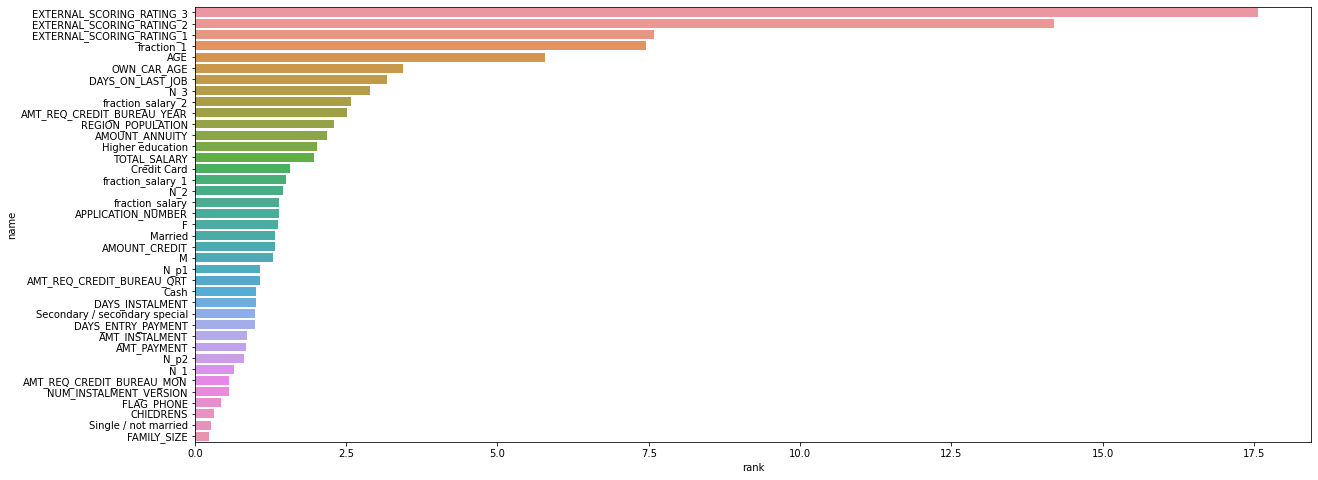

In [39]:
rank_feature_importances_ = model.feature_importances_

train_feature_importances = pd.DataFrame(rank_feature_importances_, train_data.columns)
train_feature_importances.reset_index(inplace=True)
train_feature_importances = train_feature_importances.rename(columns={'index': 'name', 0: 'rank'}) 
train_feature_importances.sort_values(by="rank", inplace=True, ascending = False)

plt.figure(figsize = ([20,8]))
sns.barplot(train_feature_importances['rank'], train_feature_importances['name'])

In [40]:
train_feature_importances['name']

13        EXTERNAL_SCORING_RATING_3
12        EXTERNAL_SCORING_RATING_2
11        EXTERNAL_SCORING_RATING_1
28                       fraction_1
6                               AGE
8                       OWN_CAR_AGE
7                  DAYS_ON_LAST_JOB
31                              N_3
27                fraction_salary_2
16       AMT_REQ_CREDIT_BUREAU_YEAR
5                 REGION_POPULATION
4                    AMOUNT_ANNUITY
21                 Higher education
2                      TOTAL_SALARY
18                      Credit Card
26                fraction_salary_1
30                              N_2
25                  fraction_salary
0                APPLICATION_NUMBER
19                                F
23                          Married
3                     AMOUNT_CREDIT
20                                M
37                             N_p1
15        AMT_REQ_CREDIT_BUREAU_QRT
17                             Cash
33                  DAYS_INSTALMENT
22    Secondary / secondary 

In [41]:
#x_train, x_valid, y_train, y_valid = train_test_split(train_data, train_target, test_size=0.30)

In [42]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 600,
    "reg_lambda": 100,
    "max_depth": 7,
    "gamma": 10,
    "nthread": 6,
    "seed": 27,
    'colsample_bytree': 0.555,
    'min_child_weights': 369
}

In [43]:
dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)
dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

In [44]:
model_xgb = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=600,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    early_stopping_rounds=50,
    verbose_eval=10,
)

[02:30:45] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.67528	valid-auc:0.67178
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[10]	train-auc:0.70217	valid-auc:0.69859
[20]	train-auc:0.71909	valid-auc:0.71457
[30]	train-auc:0.72711	valid-auc:0.72290
[40]	train-auc:0.73228	valid-auc:0.72743
[50]	train-auc:0.73688	valid-auc:0.73193
[60]	train-auc:0.74106	valid-auc:0.73553
[70]	train-auc:0.74406	valid-auc:0.73823
[80]	train-auc:0.74700	valid-auc:0.74084
[90]	train-auc:0.74971	valid-auc:0.74279
[100]	train-auc:0.75142	valid-auc:0.74424
[110]	train-auc:0.75325	valid-auc:0.74569
[120]	train-auc:0.75422	valid-au

In [45]:
train_score = roc_auc_score(y_train, model_xgb.predict(dtrain))
valid_score = roc_auc_score(y_valid, model_xgb.predict(dvalid))

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)})")
#Train-score: 0.758, Valid-score: 0.753)

Train-score: 0.756, Valid-score: 0.748)


In [46]:
y_pred_test_x = model_xgb.predict(xgb.DMatrix(data=test_data))
result_test_x = pd.DataFrame({
    "APPLICATION_NUMBER": test_data['APPLICATION_NUMBER'],
    "TARGET": y_pred_test_x.flatten(),})
result_test_x.head()

,APPLICATION_NUMBER,TARGET
0,123724268,0.239960
1,123456549,0.646583
2,123428178,0.422447
3,123619984,0.361546
4,123671104,0.087084


In [47]:
#filename = 'Vodorezova.csv'
#result_test_x.to_csv(filename, index=None)

In [48]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.01,
    "n_estimators": 600,
    "n_jobs": 6,
    "seed": 27
}

In [49]:
dtrain = lgbm.Dataset(
    data=x_train, label=y_train
)
dvalid = lgbm.Dataset(
    data=x_valid, label=y_valid
)

model_lgbm = lgbm.train(
    params=params,
    train_set=dtrain,
    num_boost_round=600,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=10
)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37458, number of negative: 70746
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5437
[LightGBM] [Info] Number of data points in the train set: 108204, number of used features: 39
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346179 -> initscore=-0.635876
[LightGBM] [Info] Start training from score -0.635876
Training until validation scores don't improve for 50 rounds
[10]	training's auc: 0.705225	valid_1's auc: 0.701667
[20]	training's auc: 0.708615	valid_1's auc: 0.705609
[30]	training's auc: 0.713446	valid_1's auc: 0.710237
[40]	training's auc: 0.716332	valid_1's auc: 0.712176
[

In [50]:
train_score = roc_auc_score(y_train, model_lgbm.predict(x_train))
valid_score = roc_auc_score(y_valid, model_lgbm.predict(x_valid))

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)})")

#Train-score: 0.781, Valid-score: 0.77)

Train-score: 0.782, Valid-score: 0.767)


In [51]:
y_pred_test_l = model_lgbm.predict(test_data)
result_test_l = pd.DataFrame({
    "APPLICATION_NUMBER": test_data['APPLICATION_NUMBER'],
    "TARGET": y_pred_test_l.flatten(),})
result_test_l.head()

,APPLICATION_NUMBER,TARGET
0,123724268,0.191336
1,123456549,0.674044
2,123428178,0.490027
3,123619984,0.361232
4,123671104,0.101947


In [52]:
#filename = 'Vodorezova.csv'
#result_test_l.to_csv(filename, index=None)

In [53]:
result_test.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.257586
1,123456549,0.705735


In [54]:
result_test_x.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.239960
1,123456549,0.646583


In [55]:
result_test_l.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.191336
1,123456549,0.674044


In [56]:
res = result_test.copy()
res['TARGET'] = (result_test['TARGET'] + result_test_x['TARGET'] + result_test_l['TARGET']) / 3
res.head(2)

,APPLICATION_NUMBER,TARGET
0,123724268,0.229627
1,123456549,0.675454


In [57]:
filename = 'Vodorezova.csv'
res.to_csv(filename, index=None)
# 0.72845

In [58]:
test_data_res = result_test.copy()
test_data_res['cat'] = test_data_res['TARGET']
test_data_res['xgb'] = result_test_x['TARGET']
test_data_res['lgbm'] = result_test_l['TARGET']
test_data_res.head(2)

,APPLICATION_NUMBER,TARGET,cat,xgb,lgbm
0,123724268,0.257586,0.257586,0.239960,0.191336
1,123456549,0.705735,0.705735,0.646583,0.674044


In [59]:
test_data_res = test_data_res.drop(['TARGET'], axis = 'columns')
test_data_res

,APPLICATION_NUMBER,cat,xgb,lgbm
0,123724268,0.257586,0.239960,0.191336
1,123456549,0.705735,0.646583,0.674044
2,123428178,0.546362,0.422447,0.490027
3,123619984,0.355472,0.361546,0.361232
4,123671104,0.175838,0.087084,0.101947
...,...,...,...,...
165136,123487967,0.361013,0.361546,0.361232
165137,123536402,0.288072,0.216094,0.244514
165138,123718238,0.353431,0.361546,0.361232
165139,123631557,0.091483,0.067823,0.063019


In [60]:
train_data_cat = model.predict(train_data, prediction_type =  "Probability")[:,1]
result_train_cat = pd.DataFrame({
    "APPLICATION_NUMBER": train_data['APPLICATION_NUMBER'],
    "TARGET": train_data_cat.flatten(),})
result_train_cat.head()

,APPLICATION_NUMBER,TARGET
0,123687442,0.118472
1,123597908,0.360939
2,123526683,0.219434
3,123710391,0.670310
4,123590329,0.353834


In [61]:
train_data_xgb = model_xgb.predict(xgb.DMatrix(data=train_data))
result_train_xgb = pd.DataFrame({
    "APPLICATION_NUMBER": train_data['APPLICATION_NUMBER'],
    "TARGET": train_data_xgb.flatten(),})
result_train_xgb.head()

,APPLICATION_NUMBER,TARGET
0,123687442,0.138175
1,123597908,0.367271
2,123526683,0.294592
3,123710391,0.639573
4,123590329,0.361546


In [62]:
train_data_lgbm = model_lgbm.predict(train_data)
result_train_lgbm = pd.DataFrame({
    "APPLICATION_NUMBER": train_data['APPLICATION_NUMBER'],
    "TARGET": train_data_lgbm.flatten(),})
result_train_lgbm.head()

,APPLICATION_NUMBER,TARGET
0,123687442,0.130096
1,123597908,0.361552
2,123526683,0.257449
3,123710391,0.649854
4,123590329,0.361232


In [63]:
train_data_res = result_train_cat.copy()
train_data_res['cat'] = train_data_res['TARGET']
train_data_res['xgb'] = result_train_xgb['TARGET']
train_data_res['lgbm'] = result_train_lgbm['TARGET']
train_data_res.head(2)

,APPLICATION_NUMBER,TARGET,cat,xgb,lgbm
0,123687442,0.118472,0.118472,0.138175,0.130096
1,123597908,0.360939,0.360939,0.367271,0.361552


In [64]:
train_data_res = train_data_res.drop(['TARGET'], axis = 'columns')
train_data_res

,APPLICATION_NUMBER,cat,xgb,lgbm
0,123687442,0.118472,0.138175,0.130096
1,123597908,0.360939,0.367271,0.361552
2,123526683,0.219434,0.294592,0.257449
3,123710391,0.670310,0.639573,0.649854
4,123590329,0.353834,0.361546,0.361232
...,...,...,...,...
154573,123647199,0.444140,0.423563,0.495152
154574,123563408,0.426689,0.382666,0.465077
154575,123460036,0.656068,0.686658,0.695949
154576,123464177,0.362331,0.361546,0.361232


In [65]:
x_train, x_valid, y_train, y_valid = train_test_split(train_data_res, train_target, test_size=0.30)

In [66]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 600,
    "reg_lambda": 100,
    "max_depth": 4,
    "gamma": 10,
    "nthread": 6,
    "seed": 27
}

In [67]:
dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)
dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

In [68]:
model_xgb = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=600,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    early_stopping_rounds=50,
    verbose_eval=10,
)

[02:31:57] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.78060	valid-auc:0.77701
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[10]	train-auc:0.79317	valid-auc:0.79004
[20]	train-auc:0.79488	valid-auc:0.79184
[30]	train-auc:0.79845	valid-auc:0.79538
[40]	train-auc:0.80118	valid-auc:0.79838
[50]	train-auc:0.80268	valid-auc:0.79993
[60]	train-auc:0.80360	valid-auc:0.80086
[70]	train-auc:0.80462	valid-auc:0.80187
[80]	train-auc:0.80552	valid-auc:0.80260
[90]	train-auc:0.80643	valid-auc:0.80343
[100]	train-auc:0.80671	valid-auc:0.80363
[110]	train-auc:0.80671	valid-auc:0.80363
[120]	train-auc:0.80671	valid-au

In [69]:
train_score = roc_auc_score(y_train, model_xgb.predict(dtrain))
valid_score = roc_auc_score(y_valid, model_xgb.predict(dvalid))

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)})")
#Train-score: 0.758, Valid-score: 0.753)

Train-score: 0.807, Valid-score: 0.804)


In [70]:
y_pred_test_x = model_xgb.predict(xgb.DMatrix(data=test_data_res))
result_test_x = pd.DataFrame({
    "APPLICATION_NUMBER": test_data['APPLICATION_NUMBER'],
    "TARGET": y_pred_test_x.flatten(),})
result_test_x.head()

,APPLICATION_NUMBER,TARGET
0,123724268,0.096970
1,123456549,0.732743
2,123428178,0.632754
3,123619984,0.340899
4,123671104,0.039636


In [71]:
filename = 'Vodorezova.csv'
result_test_x.to_csv(filename, index=None)
# 0.72845
# 0.71933